In [196]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn import linear_model
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set_style('white')

In [197]:
MassCrime2013_DF = pd.read_csv('offenses_known_to_law_enforcement_massachusetts_by_city_2013.csv', skiprows=4).drop(['Rape\n(legacy\ndefinition)2', 'Unnamed: 13'], axis=1)[:-3]
#MassCrime2013_DF = MassCrime2013_DF.drop( 276)
MassCrime2013_DF = MassCrime2013_DF.dropna()

In [198]:
#Remove comma and turn variable population into numaric
population = []
Propertycrime = []
Arsoncrime = []
Aggravatedcrime = []

for x in MassCrime2013_DF['Population']:
    pop1 = str(x).replace(',','')
    population.append(int(pop1))

MassCrime2013_DF['Population'] = population

for x in MassCrime2013_DF['Property\ncrime']:
    pop2 = str(x).replace(',','')
    Propertycrime.append(int(pop2))

MassCrime2013_DF['Property crime'] = Propertycrime

for x in MassCrime2013_DF['Arson3']:
    pop3 = str(x).replace(',','')
    Arsoncrime.append(float(pop3))

MassCrime2013_DF['Arson'] = Arsoncrime

#for x in MassCrime2013_DF['Aggravated\nassault']:
#    pop4 = str(x).replace(',','')
#    Aggravatedcrime.append(float(pop4))

#MassCrime2013_DF['Aggravated assault'] = Aggravatedcrime

MassCrime2013_DF['Aggravated assault'] = MassCrime2013_DF['Aggravated\nassault'].str.replace(',', '')
MassCrime2013_DF['Aggravated assault'] = MassCrime2013_DF['Aggravated assault'].astype(int)
MassCrime2013_DF['Burglary'] = MassCrime2013_DF['Burglary'].str.replace(',', '')
MassCrime2013_DF['Burglary'] = MassCrime2013_DF['Burglary'].astype(int)
MassCrime2013_DF['Larceny-theft'] = MassCrime2013_DF['Larceny-\ntheft'].str.replace(',', '')
MassCrime2013_DF['Larceny-theft'] = MassCrime2013_DF['Larceny-theft'].astype(int)
MassCrime2013_DF['Motor vehicle theft'] = MassCrime2013_DF['Motor\nvehicle\ntheft'].str.replace(',', '')
MassCrime2013_DF['Motor vehicle theft'] = MassCrime2013_DF['Motor vehicle theft'].astype(int)
MassCrime2013_DF['Robbery'] = MassCrime2013_DF['Robbery'].str.replace(',', '')
MassCrime2013_DF['Robbery'] = MassCrime2013_DF['Robbery'].astype(int)

MassCrime2013_DF['Violent\ncrime'] = MassCrime2013_DF['Violent\ncrime'].str.replace(',', '')
MassCrime2013_DF['Violent\ncrime'] = MassCrime2013_DF['Violent\ncrime'].astype(int)

MassCrime2013_DF =MassCrime2013_DF.dropna()

In [199]:
MassCrime2013_DF = MassCrime2013_DF.drop(['Aggravated\nassault', 'Burglary', 'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'Property\ncrime'], axis=1)

In [200]:
MassCrime2013_DF.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Property crime,Arson,Aggravated assault,Larceny-theft,Motor vehicle theft
0,Abington,16121,48,0.0,5.0,7,297,1.0,36,201,14
1,Acton,22871,8,0.0,1.0,2,178,0.0,5,144,3
2,Acushnet,10362,19,0.0,2.0,0,74,2.0,17,40,7
3,Adams,8352,21,0.0,3.0,3,157,1.0,15,109,8
4,Agawam,28659,41,0.0,12.0,3,270,1.0,26,130,35


In [201]:
#creating a binary outcome
MassCrime2013_DF['Robbery'] = np.where(pd.to_numeric(MassCrime2013_DF['Robbery']) > 1, 1, 0)

In [202]:
MassCrime2013_DF.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Property crime,Arson,Aggravated assault,Larceny-theft,Motor vehicle theft
0,Abington,16121,48,0.0,5.0,1,297,1.0,36,201,14
1,Acton,22871,8,0.0,1.0,1,178,0.0,5,144,3
2,Acushnet,10362,19,0.0,2.0,0,74,2.0,17,40,7
3,Adams,8352,21,0.0,3.0,1,157,1.0,15,109,8
4,Agawam,28659,41,0.0,12.0,1,270,1.0,26,130,35


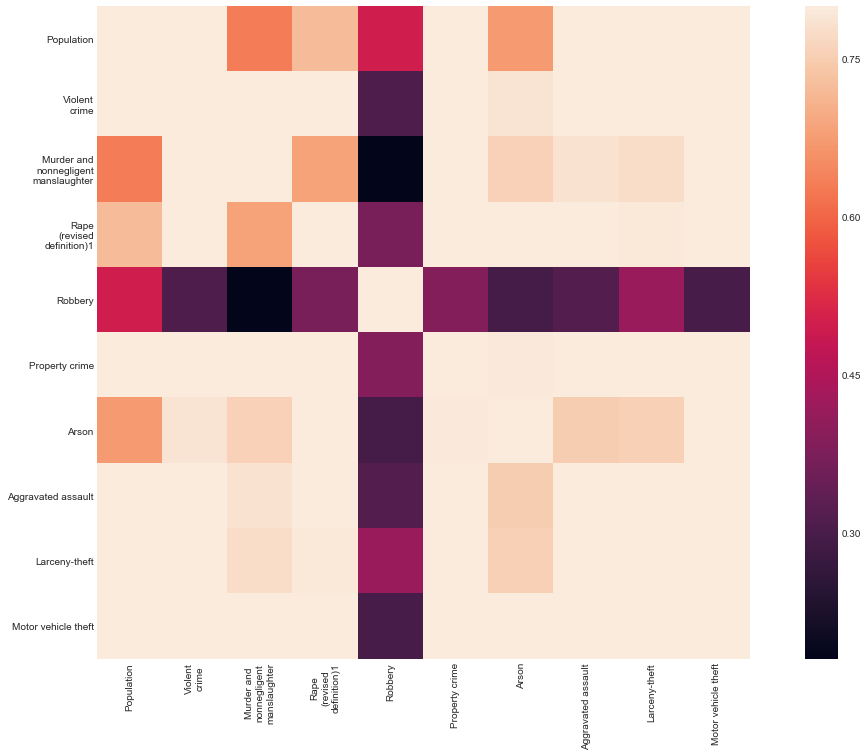

In [203]:
# Make the correlation matrix.
corrmat = MassCrime2013_DF.corr()
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(20, 12))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [252]:
MassCrime2013_DF2 = MassCrime2013_DF.drop(['Murder and\nnonnegligent\nmanslaughter', 'Property crime', 'Aggravated assault', 'Violent\ncrime', 'Larceny-theft', 'Motor vehicle theft', 'Rape\n(revised\ndefinition)1'], axis=1)

            Population   Robbery     Arson
Population    1.000000  0.497399  0.671999
Robbery       0.497399  1.000000  0.293598
Arson         0.671999  0.293598  1.000000


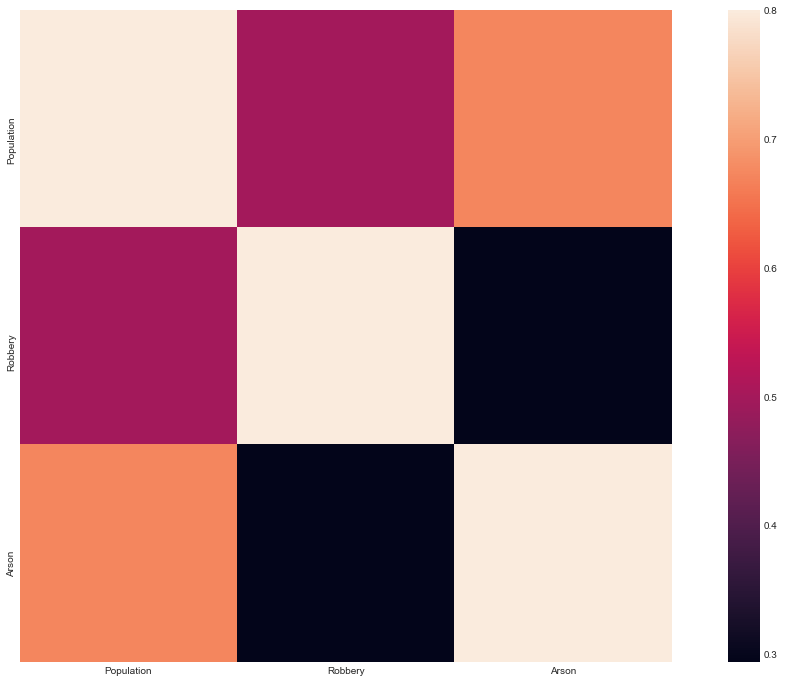

In [253]:
# Make the correlation matrix.
corrmat = MassCrime2013_DF2.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(20, 12))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [254]:
#spliting trainning and testing data
y = pd.DataFrame(MassCrime2013_DF['Robbery'])
X_train, X_test, y_train, y_test = train_test_split(MassCrime2013_DF.drop(['City','Robbery'], axis=1), y, test_size=0.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(MassCrime2013_DF2.drop(['City','Robbery'], axis=1), y, test_size=0.2)

In [255]:
#Models
regr1 = linear_model.LinearRegression()
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False)
lass = linear_model.Lasso(alpha=0.35)

#fit
regr1.fit(X_train2, y_train2)
ridgeregr.fit(X_train2, y_train2)
lass.fit(X_train2, y_train2)

print('R² for the model with few features:')
print('Linear model:' +  str(regr1.score(X_train2, y_train2)))
print('Ridge model:' +  str(ridgeregr.score(X_train2, y_train2)))
print('lasso model:' +  str(lass.score(X_train2, y_train2)))

R² for the model with few features:
Linear model:0.271106720036
Ridge model:0.158979731521
lasso model:0.252672842149


In [256]:
print('R² for the model with few features:')
print('Linear model:' +  str(regr1.score(X_test2, y_test2)))
print('Ridge model:' +  str(ridgeregr.score(X_test2, y_test2)))
print('lasso model:' +  str(lass.score(X_test2, y_test2)))

R² for the model with few features:
Linear model:0.0825455357456
Ridge model:-0.422644921076
lasso model:0.205490641098


In [257]:
#fit
regr1.fit(X_train, y_train)
ridgeregr.fit(X_train, y_train)
lass.fit(X_train, y_train)

print('R² for the model with many features:')
print('Linear model:' +  str(regr1.score(X_train, y_train)))
print('Ridge model:' +  str(ridgeregr.score(X_train, y_train)))
print('lasso model:' +  str(lass.score(X_train, y_train)))

R² for the model with few features:
Linear model:0.35073814801
Ridge model:0.297789699079
lasso model:0.325921766174


In [258]:
print('R² for the model with many features:')
print('Linear model:' +  str(regr1.score(X_test, y_test)))
print('Ridge model:' +  str(ridgeregr.score(X_test, y_test)))
print('lasso model:' +  str(lass.score(X_test, y_test)))

R² for the model with few features:
Linear model:0.253478923494
Ridge model:0.174334399399
lasso model:0.230863392124
